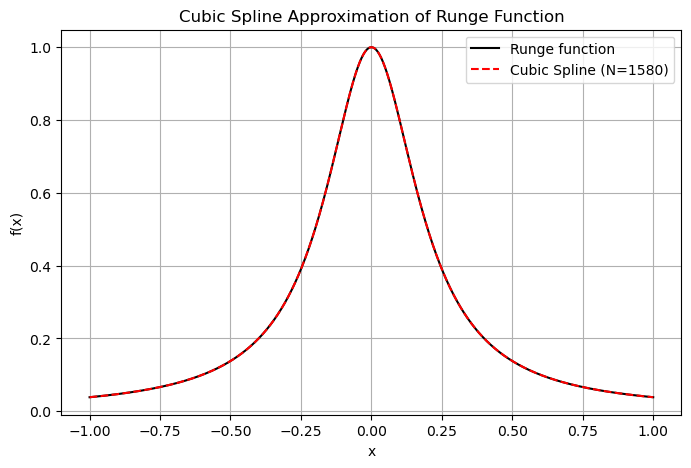

找到的 N = 1580, 最大誤差 = 9.976e-11


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# 定義 Runge function
def runge_function(x):
    return 1 / (1 + 25 * x**2)

# 誤差門檻
tol = 1e-10
max_iter = 5000  # 安全限制，避免無窮迴圈

# 測試點 (高精度)
x_test = np.linspace(-1, 1, 10001)
f_true = runge_function(x_test)

# 搜尋最小 N
N = 2
error = 1.0
while error > tol and N < max_iter:
    x_nodes = np.linspace(-1, 1, N + 1)
    y_nodes = runge_function(x_nodes)
    spline = CubicSpline(x_nodes, y_nodes)
    f_approx = spline(x_test)
    error = np.max(np.abs(f_true - f_approx))
    if error < tol:
        break
    N += 1

# 繪圖
plt.figure(figsize=(8, 5))
plt.plot(x_test, f_true, 'k-', label="Runge function")
plt.plot(x_test, f_approx, 'r--', label=f"Cubic Spline (N={N})")
#plt.plot(x_nodes, y_nodes, 'bo', markersize=3, label="Nodes")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Cubic Spline Approximation of Runge Function")
plt.legend()
plt.grid(True)
plt.show()

print(f"找到的 N = {N}, 最大誤差 = {error:.3e}")

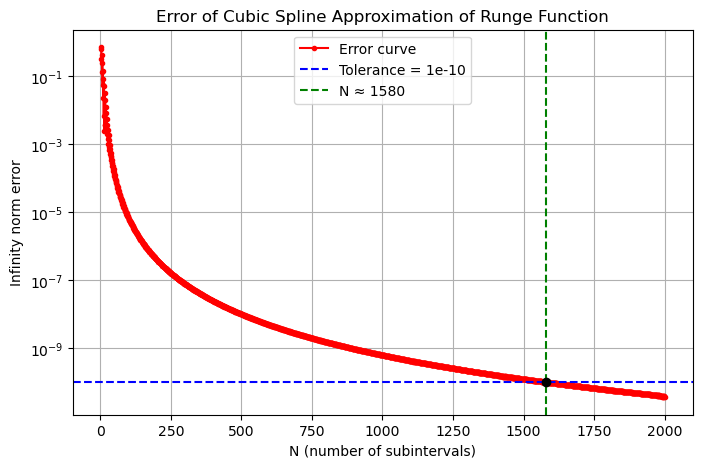

誤差首次小於 1e-10 時的 N ≈ 1580


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# 定義 Runge function
def runge_function(x):
    return 1 / (1 + 25 * x**2)

# 測試點 (高解析度)
x_test = np.linspace(-1, 1, 10001)
f_true = runge_function(x_test)

# 記錄 N 與誤差
N_values = np.arange(2, 2001, 1)  # 測試 N = 2, 22, 42, ..., 2000
errors = []

for N in N_values:
    x_nodes = np.linspace(-1, 1, N + 1)
    y_nodes = runge_function(x_nodes)
    spline = CubicSpline(x_nodes, y_nodes)
    f_approx = spline(x_test)
    error = np.max(np.abs(f_true - f_approx))
    errors.append(error)

# 找到第一個小於 1e-10 的 N
N_target = None
for N, e in zip(N_values, errors):
    if e < 1e-10:
        N_target = N
        break

# 繪圖
plt.figure(figsize=(8, 5))
plt.semilogy(N_values, errors, 'ro-', markersize=3, label="Error curve")

# 標示出達到誤差要求的 N
if N_target:
    plt.axhline(1e-10, color='b', linestyle='--', label="Tolerance = 1e-10")
    plt.axvline(N_target, color='g', linestyle='--', label=f"N ≈ {N_target}")
    plt.scatter(N_target, errors[N_values.tolist().index(N_target)], color='k', zorder=5)

plt.xlabel("N (number of subintervals)")
plt.ylabel("Infinity norm error")
plt.title("Error of Cubic Spline Approximation of Runge Function")
plt.legend()
plt.grid(True, which="both")
plt.show()

print(f"誤差首次小於 1e-10 時的 N ≈ {N_target}")

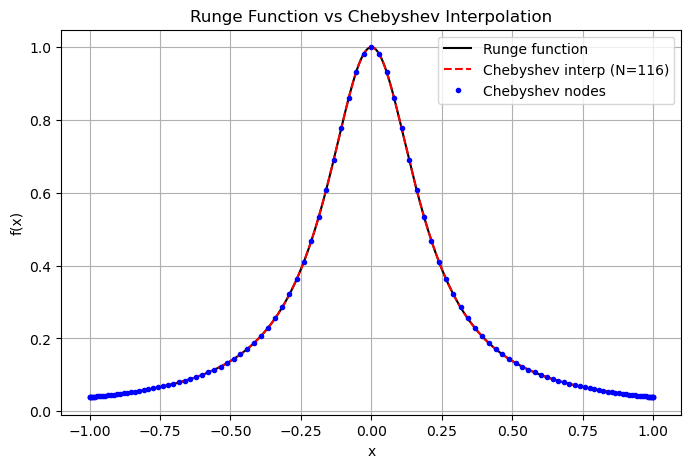

找到的 N = 116, Infinity norm 誤差 = 8.018e-11


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator

# 定義 Runge function
def runge_function(x):
    return 1 / (1 + 25 * x**2)

# 誤差門檻
tol = 1e-10
max_iter = 500

# 測試點 (高解析度)
x_test = np.linspace(-1, 1, 5001)
f_true = runge_function(x_test)

# 搜尋最小 N
N = 2
error = 1.0
while error > tol and N < max_iter:
    k = np.arange(N + 1)
    x_nodes = np.cos((2*k + 1) * np.pi / (2*(N+1)))   # Chebyshev nodes
    y_nodes = runge_function(x_nodes)
    
    interpolant = BarycentricInterpolator(x_nodes, y_nodes)
    f_approx = interpolant(x_test)
    
    error = np.max(np.abs(f_true - f_approx))
    if error < tol:
        break
    N += 1

# 畫原函數 vs 插值
plt.figure(figsize=(8,5))
plt.plot(x_test, f_true, 'k-', label="Runge function")
plt.plot(x_test, f_approx, 'r--', label=f"Chebyshev interp (N={N})")
plt.plot(x_nodes, y_nodes, 'bo', markersize=3, label="Chebyshev nodes")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Runge Function vs Chebyshev Interpolation")
plt.legend()
plt.grid(True)
plt.show()

print(f"找到的 N = {N}, Infinity norm 誤差 = {error:.3e}")

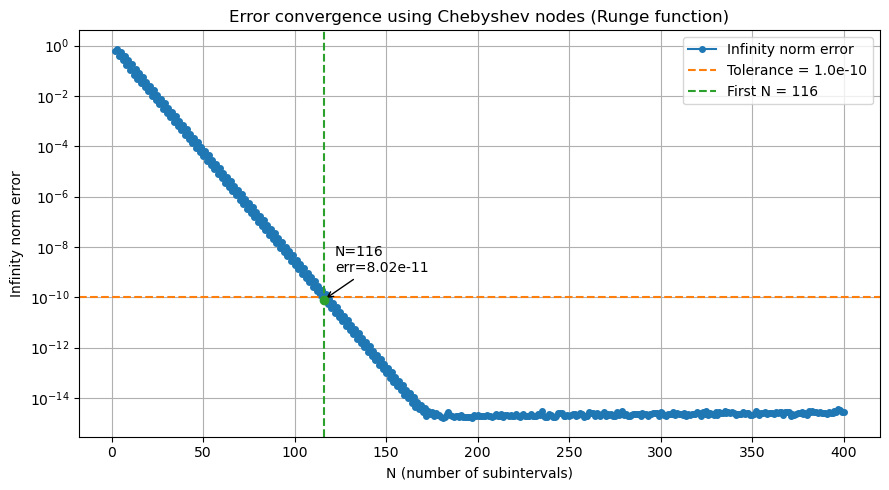

First N with error < 1e-10: N = 116, error = 8.018e-11


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator

# ---- 原函數 ----
def runge_function(x):
    return 1.0 / (1.0 + 25.0 * x**2)

# ---- 參數（可調）----
tol = 1e-10                  # 容差
x_test = np.linspace(-1, 1, 10001)   # 用來估算 infinity norm 的測試點（越密越準）
f_true = runge_function(x_test)

N_min = 2
N_max = 400                 # 可以改大一點以搜尋更大的 N
Ns = range(N_min, N_max+1)

errors = []
N_found = None
err_found = None

# ---- 對每個 N 計算 Chebyshev interpolation 的 infinity norm ----
for N in Ns:
    k = np.arange(N + 1)
    # Chebyshev nodes (第一類或第二類皆可；此處用常見的位於 [-1,1] 的節點)
    x_nodes = np.cos((2*k + 1) * np.pi / (2*(N + 1)))
    y_nodes = runge_function(x_nodes)
    interp = BarycentricInterpolator(x_nodes, y_nodes)
    f_approx = interp(x_test)
    err = np.max(np.abs(f_true - f_approx))
    errors.append(err)
    # 若第一次達到容差，記下來（但仍繼續算完所有 N 以畫完整曲線）
    if N_found is None and err < tol:
        N_found = N
        err_found = err

# ---- 畫 N vs infinity-norm-error（對數刻度） ----
plt.figure(figsize=(9,5))
plt.semilogy(list(Ns), errors, 'o-', markersize=4, label='Infinity norm error')
plt.axhline(tol, color='C1', linestyle='--', label=f'Tolerance = {tol:.1e}')

if N_found is not None:
    plt.axvline(N_found, color='C2', linestyle='--', label=f'First N = {N_found}')
    plt.scatter([N_found], [err_found], color='C2', zorder=10)
    plt.annotate(f'N={N_found}\nerr={err_found:.2e}',
                 xy=(N_found, err_found),
                 xytext=(N_found + 6, max(err_found*10, tol*10)),
                 arrowprops=dict(arrowstyle='->'))

plt.xlabel('N (number of subintervals)')
plt.ylabel('Infinity norm error')
plt.title('Error convergence using Chebyshev nodes (Runge function)')
plt.grid(True, which='both')
plt.legend()
plt.tight_layout()
plt.show()

# ---- 列印結果 ----
if N_found is not None:
    print(f'First N with error < {tol}: N = {N_found}, error = {err_found:.3e}')
else:
    print(f'No N in [{N_min}, {N_max}] reached tolerance {tol}. You can increase N_max or increase x_test resolution.')